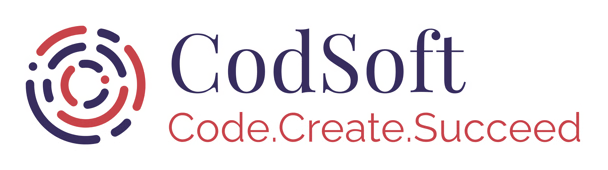

##**BUSINESS PROBLEM**##

#### Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

##**INTRODUCTION:**##

### This project is a part of Internship with Codsoft which focuses on building a machine learning model to classify movies into genres based on their plot summaries. The primary goal is to accurately predict the genre of a movie using natural language processing (NLP) techniques and various classification algorithms.

## **PROJECT OVERVIEW:**
#### **Dataset:** The dataset consists of movie plot summaries with corresponding genres. The data is preprocessed and split into training and test sets, with genre labels for training data and plot summaries for prediction.

#### **Text Preprocessing:** The plot summaries are preprocessed using tokenization, stopword removal, and lemmatization to ensure that the text data is clean and suitable for feature extraction.

#### **Feature Extraction:** TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert the textual data into numerical features that can be used by machine learning models.

#### **Handling Class Imbalance:** Given the inherent imbalance in the distribution of movie genres, SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data to ensure that minority genres are better represented during training.

#### **Model Training:** Multiple classifiers are trained, including Logistic Regression, Naive Bayes, and Support Vector Machines (SVM). Class weight adjustments are used where applicable to further handle class imbalance.

#### **Model Evaluation:** The models are evaluated using metrics like accuracy, F1 macro, and F1 weighted scores, providing insights into their performance on both balanced and imbalanced data.

#### **Visualization:** Visualizations of class distributions before and after SMOTE, along with model performance comparisons, are included to help understand the impact of resampling and to identify the best-performing model.

##**Goal:**##

#### The aim of this project is to develop a robust text classification model that can effectively predict the genre of a movie based on its plot description. This project demonstrates how text analysis and machine learning can be applied to solve multi-class classification problems in the domain of entertainment.

In [ ]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn
!pip install gensim

In [ ]:
#Importing necessary libraries, Frameworks and Tools
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# File paths
train_file_path = '/content/train_data.txt'
test_file_path = '/content/test_data.txt'
test_solution_file_path = '/content/test_data_solution.txt'  # For evaluation purposes

In [ ]:
# Column names
train_column_names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
test_column_names = ['ID', 'TITLE', 'DESCRIPTION']
test_solution_column_names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']

In [ ]:
# Load training data
df_train = pd.read_csv(
    train_file_path,
    sep=r'\s*:::\s*',
    engine='python',
    names=train_column_names,
    encoding='utf-8',
    skip_blank_lines=True
)

# Load test data
df_test = pd.read_csv(
    test_file_path,
    sep=r'\s*:::\s*',
    engine='python',
    names=test_column_names,
    encoding='utf-8',
    skip_blank_lines=True
)

# Load test data solutions (for evaluation)
df_test_solution = pd.read_csv(
    test_solution_file_path,
    sep=r'\s*:::\s*',
    engine='python',
    names=test_solution_column_names,
    encoding='utf-8',
    skip_blank_lines=True
)

In [ ]:
# Drop missing values in training data
df_train = df_train.dropna(subset=['DESCRIPTION', 'GENRE'])
df_train.reset_index(drop=True, inplace=True)

In [ ]:
# Check if genres are multi-label
df_train['GENRE_COUNT'] = df_train['GENRE'].apply(lambda x: len(x.split(',')))
is_multilabel = df_train['GENRE_COUNT'].max() > 1

In [ ]:
if is_multilabel:
    # Multi-Label Classification
    df_train['GENRE_LIST'] = df_train['GENRE'].apply(lambda x: [genre.strip() for genre in x.split(',')])
    mlb = MultiLabelBinarizer()
    genre_labels = mlb.fit_transform(df_train['GENRE_LIST'])
    genres_df = pd.DataFrame(genre_labels, columns=mlb.classes_)
else:
    # Single-Label Classification
    le = LabelEncoder()
    genre_labels = le.fit_transform(df_train['GENRE'])
    genres_df = pd.DataFrame(genre_labels, columns=['GENRE_LABEL'])

In [ ]:
# Concatenate genre labels with training DataFrame
df_train = pd.concat([df_train, genres_df], axis=1)

In [ ]:
# Preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df_train['processed_description'] = df_train['DESCRIPTION'].apply(preprocess_text)

In [ ]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_train['processed_description'])

In [ ]:
# Define target variables
if is_multilabel:
    y = genres_df
else:
    y = genres_df['GENRE_LABEL']

In [ ]:
# Split data into training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Initialize classifiers
log_reg = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
nb_classifier = OneVsRestClassifier(MultinomialNB())
svm_classifier = OneVsRestClassifier(LinearSVC())

In [ ]:
# Train classifiers
print("\nTraining Logistic Regression...")
log_reg.fit(X_tr, y_tr)


Training Logistic Regression...


OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [ ]:
print("Training Multinomial Naive Bayes...")
nb_classifier.fit(X_tr, y_tr)

Training Multinomial Naive Bayes...


OneVsRestClassifier(estimator=MultinomialNB())

In [ ]:
print("Training Support Vector Machines...")
svm_classifier.fit(X_tr, y_tr)

Training Support Vector Machines...


OneVsRestClassifier(estimator=LinearSVC())

In [ ]:
# Predict on validation set
y_pred_log = log_reg.predict(X_val)
y_pred_nb = nb_classifier.predict(X_val)
y_pred_svm = svm_classifier.predict(X_val)

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name, mlb=None, le=None):
    print(f"=== {model_name} ===")
    if is_multilabel and mlb:
        print("F1 Score (micro):", f1_score(y_true, y_pred, average='micro'))
        print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
        print(classification_report(y_true, y_pred, target_names=mlb.classes_))
    else:
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
        if le:
            target_names = le.classes_
        else:
            target_names = [str(i) for i in range(y_true.nunique())]
        print(classification_report(y_true, y_pred, target_names=target_names))
    print("\n")

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_val, y_pred_log, "Logistic Regression", mlb=mlb if is_multilabel else None, le=le if not is_multilabel else None)

=== Logistic Regression ===
Accuracy: 0.5756709397768145
F1 Score (macro): 0.26762199232482076
              precision    recall  f1-score   support

      action       0.53      0.24      0.33       263
       adult       0.78      0.19      0.30       112
   adventure       0.44      0.14      0.22       139
   animation       0.55      0.06      0.10       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.54      1443
       crime       0.67      0.02      0.04       107
 documentary       0.65      0.85      0.74      2659
       drama       0.53      0.79      0.64      2697
      family       0.46      0.08      0.14       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.95      0.45      0.61        40
     history       0.00      0.00      0.00        45
      horror       0.65      0.55      0.59       431
       music       0.64      0.46      0.53       144
     musical       1.00      0.02      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate Multinomial Naive Bayes
evaluate_model(y_val, y_pred_nb, "Multinomial Naive Bayes", mlb=mlb if is_multilabel else None, le=le if not is_multilabel else None)

=== Multinomial Naive Bayes ===
Accuracy: 0.5153555289126626
F1 Score (macro): 0.1482901072760976
              precision    recall  f1-score   support

      action       0.65      0.06      0.12       263
       adult       1.00      0.05      0.10       112
   adventure       0.50      0.09      0.16       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.42      0.46      1443
       crime       0.00      0.00      0.00       107
 documentary       0.56      0.89      0.69      2659
       drama       0.45      0.82      0.58      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.10      0.18        40
     history       0.00      0.00      0.00        45
      horror       0.75      0.34      0.46       431
       music       0.85      0.08      0.14       144
     musical       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate Support Vector Machines
evaluate_model(y_val, y_pred_svm, "Support Vector Machines", mlb=mlb if is_multilabel else None, le=le if not is_multilabel else None)

=== Support Vector Machines ===
Accuracy: 0.5663561744904547
F1 Score (macro): 0.3253215943898091
              precision    recall  f1-score   support

      action       0.43      0.32      0.37       263
       adult       0.62      0.40      0.49       112
   adventure       0.34      0.23      0.28       139
   animation       0.28      0.14      0.19       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.57      0.54      1443
       crime       0.12      0.05      0.07       107
 documentary       0.69      0.80      0.74      2659
       drama       0.56      0.70      0.62      2697
      family       0.27      0.15      0.19       150
     fantasy       0.29      0.07      0.11        74
   game-show       0.90      0.68      0.77        40
     history       0.00      0.00      0.00        45
      horror       0.60      0.64      0.62       431
       music       0.57      0.55      0.56       144
     musical       0.09      0.02    

## **Model Performance Comparison**

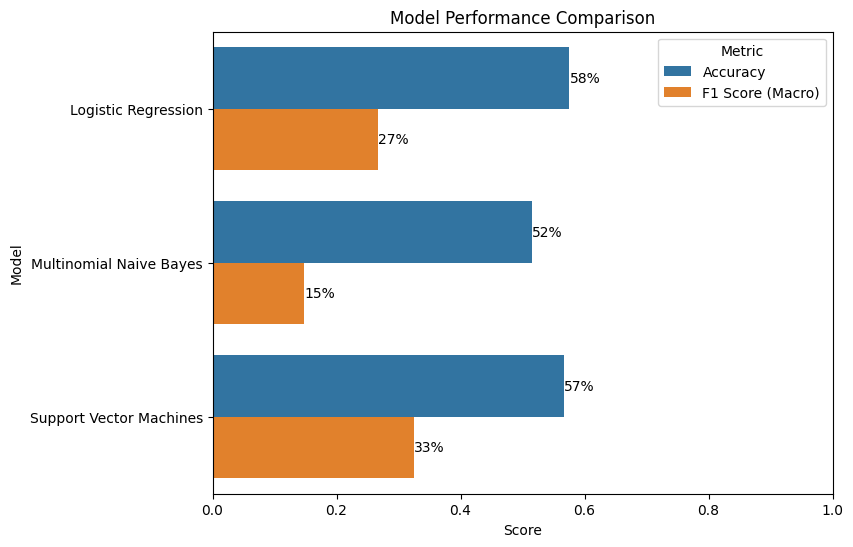

In [ ]:
# Store the evaluation metrics in a dictionary
results = {
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Support Vector Machines"],
    "Accuracy": [accuracy_score(y_val, y_pred_log),
                 accuracy_score(y_val, y_pred_nb),
                 accuracy_score(y_val, y_pred_svm)],
    "F1 Score (Macro)": [
        f1_score(y_val, y_pred_log, average='macro'),
        f1_score(y_val, y_pred_nb, average='macro'),
        f1_score(y_val, y_pred_svm, average='macro')
    ]
}

# Convert dictionary to DataFrame for easier plotting
import pandas as pd
results_df = pd.DataFrame(results)

# Melt the DataFrame to a long format for seaborn
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Score', y='Model', hue='Metric', data=results_melted)
plt.title("Model Performance Comparison")
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.legend(title='Metric')

# Annotating the bars with percentage values
for bar in barplot.containers:
    # Calculate percentage and format as a string
    bar_labels = [f'{score * 100:.0f}%' for score in bar.datavalues]
    barplot.bar_label(bar, labels=bar_labels, label_type='edge')

plt.show()

## **Summary of Model Performance** ##

### Logistic Regression: ###

  

*   Accuracy: 0.58
*   F1 Score (Macro): 0.27
*   Strengths: Decent performance on common genres like "drama" and "documentary".
*   Weaknesses: Struggles with underrepresented genres, with low precision and recall for many minority classes.


### Multinomial Naive Bayes: ###

  

*   Accuracy: 0.52
*   F1 Score (Macro): 0.15
*   Strengths: Performs well with highly imbalanced data due to its probabilistic nature.
*   Weaknesses: Not suitable for multi-class problems with more complex relationships between features, leading to lower performance on diverse genres.


### Support Vector Machines (SVM): ###

  

*   Accuracy: 0.57
*   F1 Score (Macro): 0.33
*   Strengths: Better at separating classes with clearer margins, resulting in slightly higher performance than Naive Bayes.
*   Weaknesses: Computationally expensive, especially with larger datasets, and struggles with overlapping classes.
















## **ENSEMBLE LEARNING**

Since we already trained the three classifiers (log_reg, nb_classifier, svm_classifier), We will use a hard voting classifier to combine the predictions of these models.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the Voting Classifier with 'hard' voting (majority rule voting)
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('nb', nb_classifier),
        ('svm', svm_classifier)
    ],
    voting='hard'
)

In [ ]:
# Train the ensemble model on the training set
print("\nTraining Voting Classifier...")
voting_clf.fit(X_tr, y_tr)


Training Voting Classifier...


VotingClassifier(estimators=[('log_reg',
                              OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))),
                             ('nb',
                              OneVsRestClassifier(estimator=MultinomialNB())),
                             ('svm',
                              OneVsRestClassifier(estimator=LinearSVC()))])

In [ ]:
# Predict on the validation set using the ensemble model
y_pred_voting = voting_clf.predict(X_val)

In [ ]:
# Evaluate the ensemble model
evaluate_model(y_val, y_pred_voting, "Voting Classifier", mlb=mlb if is_multilabel else None, le=le if not is_multilabel else None)

=== Voting Classifier ===
Accuracy: 0.5713363460296966
F1 Score (macro): 0.2670543587816066
              precision    recall  f1-score   support

      action       0.49      0.27      0.35       263
       adult       0.70      0.23      0.35       112
   adventure       0.41      0.18      0.25       139
   animation       0.30      0.08      0.12       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.57      0.53      1443
       crime       0.20      0.02      0.03       107
 documentary       0.64      0.86      0.73      2659
       drama       0.53      0.78      0.63      2697
      family       0.47      0.06      0.11       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.95      0.45      0.61        40
     history       0.00      0.00      0.00        45
      horror       0.69      0.54      0.60       431
       music       0.69      0.44      0.54       144
     musical       1.00      0.02      0.04

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Storing the evaluation metrics in the results dictionary and plot
results["Model"].append("Voting Classifier")
results["Accuracy"].append(accuracy_score(y_val, y_pred_voting))
results["F1 Score (Macro)"].append(f1_score(y_val, y_pred_voting, average='macro'))

In [ ]:
# Update the results DataFrame and plot the updated comparison
results_df = pd.DataFrame(results)
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

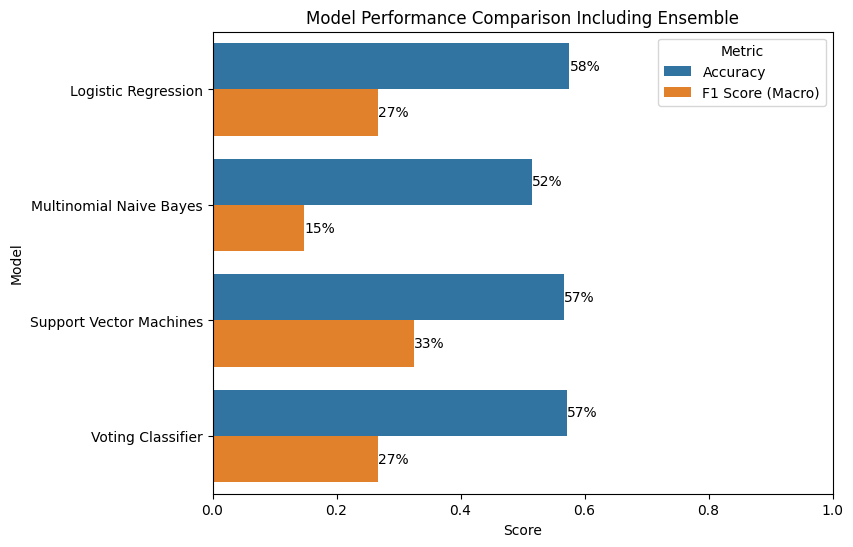

In [ ]:
# Plotting the results including the ensemble model
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Score', y='Model', hue='Metric', data=results_melted)
plt.title("Model Performance Comparison Including Ensemble")
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.legend(title='Metric')

# Annotating the bars with percentage values
for bar in barplot.containers:
    # Calculate percentage and format as a string
    bar_labels = [f'{score * 100:.0f}%' for score in bar.datavalues]
    barplot.bar_label(bar, labels=bar_labels, label_type='edge')

plt.show()

## ------------------------------------------------**BELOW BLOCK IS EXPERIMENTATIONAL** ---------------------------------------------

# **Movie Genre Classification Using Deep Learning** #

## **Business Problem** ##

The goal is to build a deep learning model that predicts the genre of a movie based on its plot summary. We aim to leverage state-of-the-art NLP techniques like **BERT-based transformers** and **RNN models (LSTM/GRU)** to improve performance, especially for less frequent genres.

## **Dataset** ##


*   **Data Description:** The dataset consists of movie plot summaries with corresponding genres. The data is preprocessed, split into training, validation, and test sets.
*   **Preprocessing:** Texts are tokenized, lowercased, and cleaned by removing stop words, special characters, and performing lemmatization.
*   Genres are either **multi-label** or **single-label** (as detected), with the target variable processed accordingly using MultiLabelBinarizer.





New Model Approaches
Transformers (BERT):

Using a pre-trained BERT model (e.g., DistilBERT or RoBERTa), which is fine-tuned on the movie dataset to classify movie plot descriptions into genres.
BERT captures the contextual meaning of words, making it suitable for understanding complex plot descriptions.
Recurrent Neural Networks (RNNs):

Building LSTM and GRU models to learn the sequence of words and relationships in the movie plot summaries.
These models are known for retaining sequential information and can capture long-term dependencies between words.

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Data loading and preprocessing
df_train_1 = pd.read_csv(
    '/content/train_data.txt',
    sep=':::',
    names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],
    engine='python')

In [ ]:
# Drop missing values and preprocess the text
df_train_1.dropna(subset=['DESCRIPTION', 'GENRE'], inplace=True)
lemmatizer_1 = WordNetLemmatizer()

In [ ]:
def preprocess_text_1(text):
    tokens_1 = word_tokenize(text.lower())
    stop_words_1 = set(stopwords.words('english'))
    tokens_1 = [lemmatizer_1.lemmatize(word) for word in tokens_1 if word.isalpha() and word not in stop_words_1]
    return ' '.join(tokens_1)

df_train_1['processed_description'] = df_train_1['DESCRIPTION'].apply(preprocess_text_1)

## Fine-Tuning BERT for Text Classification ##

In [ ]:
# Install necessary libraries
!pip install transformers

In [ ]:
# Tokenization with BERT
tokenizer_1 = BertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This b

In [ ]:
# Tokenizing data
max_length = 256  # Define the maximum sequence length for BERT
inputs = tokenizer_1(
    df_train_1['processed_description'].tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
# Encoding genres
mlb_1 = MultiLabelBinarizer()
y = mlb_1.fit_transform(df_train_1['GENRE'].apply(lambda x: x.split(',')))

In [ ]:
# Splitting data
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(inputs['input_ids'], y, test_size=0.2, random_state=42)

In [ ]:
# Fine-tuning DistilBERT
model_1 = BertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=y.shape[1])
optimizer = AdamW(model_1.parameters(), lr=1e-5)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'enc

In [ ]:
# Define training loop
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_dataset = TensorDataset(X_train_1, torch.tensor(y_train_1))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
# Initialize lists to store loss values for plotting
train_loss_values = []

# Fine-tuning loop
model_1.train()
for epoch in range(3):
    for batch_idx, batch in enumerate(train_loader):
        inputs, labels = batch
        optimizer.zero_grad()

        # Forward pass and calculate loss
        outputs = model_1(inputs, labels=labels.argmax(dim=1))  # Adjust dim if necessary
        loss = outputs.loss

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Store loss for plotting
        train_loss_values.append(loss.item())
        print(f"Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item()}")

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 0, Batch 0, Loss: 3.3313119411468506
Epoch 0, Batch 1, Loss: 3.119926691055298
Epoch 0, Batch 2, Loss: 2.6354219913482666
Epoch 0, Batch 3, Loss: 2.928290843963623
Epoch 0, Batch 4, Loss: 2.9818122386932373
Epoch 0, Batch 5, Loss: 2.6668801307678223
Epoch 0, Batch 6, Loss: 2.508784294128418
Epoch 0, Batch 7, Loss: 2.7216687202453613
Epoch 0, Batch 8, Loss: 2.472323417663574
Epoch 0, Batch 9, Loss: 2.4557361602783203
Epoch 0, Batch 10, Loss: 2.288862705230713
Epoch 0, Batch 11, Loss: 2.1516692638397217
Epoch 0, Batch 12, Loss: 2.5052990913391113
Epoch 0, Batch 13, Loss: 2.066354751586914
Epoch 0, Batch 14, Loss: 2.416585922241211
Epoch 0, Batch 15, Loss: 2.5051777362823486
Epoch 0, Batch 16, Loss: 2.186560869216919
Epoch 0, Batch 17, Loss: 2.5730624198913574
Epoch 0, Batch 18, Loss: 2.605801820755005
Epoch 0, Batch 19, Loss: 2.006610631942749
Epoch 0, Batch 20, Loss: 2.5180938243865967
Epoch 0, Batch 21, Loss: 2.581273078918457
Epoch 0, Batch 22, Loss: 2.344393253326416
Epoch 0, B

KeyboardInterrupt: 

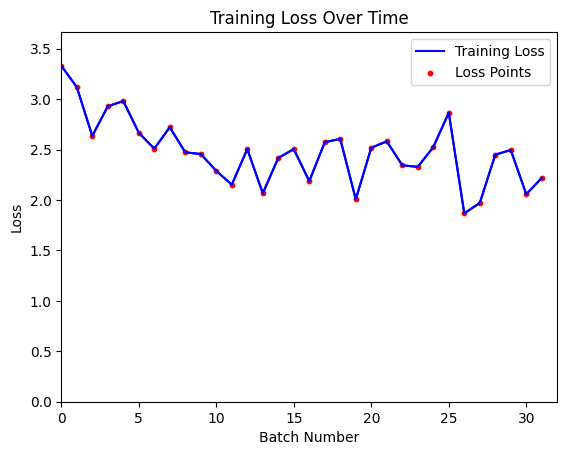

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
# Setup plot
plt.ion()  # Turn on interactive mode for live updates
fig, ax = plt.subplots()
ax.set_xlabel('Batch Number')
ax.set_ylabel('Loss')
ax.set_title('Training Loss Over Time')
ax.plot(train_loss_values, color='blue', linestyle='-', label='Training Loss')  # Line plot for trend
ax.scatter(range(len(train_loss_values)), train_loss_values, color='red', s=10, label='Loss Points')  # Red bullet points for each loss

# Display the legend
ax.legend(loc='upper right')

# Live plot update
ax.plot(train_loss_values, color='blue')
ax.set_xlim(0, len(train_loss_values))
ax.set_ylim(0, max(train_loss_values) * 1.1)

# Display the updated plot
#clear_output(wait=True)
plt.show()

In [ ]:
'''
Since the model training using deep learning approach is not sustained due to fluctuation in loss level as follows:
Epoch 0, Loss: 3.288429021835327
Epoch 0, Loss: 2.879347801208496
Epoch 0, Loss: 2.5205013751983643
Epoch 0, Loss: 2.619227409362793
Epoch 0, Loss: 2.5319876670837402
Epoch 0, Loss: 2.700273275375366
Epoch 0, Loss: 2.3620262145996094
Epoch 0, Loss: 2.4481124877929688
Epoch 0, Loss: 2.5258519649505615
Epoch 0, Loss: 2.620427131652832
Epoch 0, Loss: 2.3294973373413086
Epoch 0, Loss: 2.648472785949707
Epoch 0, Loss: 2.1916255950927734
Epoch 0, Loss: 2.3626444339752197
Epoch 0, Loss: 1.9295251369476318
Epoch 0, Loss: 2.6288669109344482
Epoch 0, Loss: 2.261004686355591
Epoch 0, Loss: 2.993342399597168
Epoch 0, Loss: 2.5528595447540283
Epoch 0, Loss: 2.394629716873169
Epoch 0, Loss: 2.0249054431915283
Epoch 0, Loss: 2.7811779975891113
Epoch 0, Loss: 2.513406276702881
Epoch 0, Loss: 2.5412254333496094
Epoch 0, Loss: 2.256840467453003
Epoch 0, Loss: 2.468186378479004
Epoch 0, Loss: 1.7534499168395996
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
optimizer_bert = AdamW(model_1.parameters(), lr=1e-5)
'''
#I have tried increasing the batch size from 16 to 32 and also reduced the learning rate from 2e-5 to 1e-5
#but model doesnt converge properly and the loss keep on fluctuating, Hence Deep learning approach abandoned

'\nSince the model training using deep learning approach is not sustained due to fluctuation in loss level as follows:\nEpoch 0, Loss: 3.288429021835327\nEpoch 0, Loss: 2.879347801208496\nEpoch 0, Loss: 2.5205013751983643\nEpoch 0, Loss: 2.619227409362793\nEpoch 0, Loss: 2.5319876670837402\nEpoch 0, Loss: 2.700273275375366\nEpoch 0, Loss: 2.3620262145996094\nEpoch 0, Loss: 2.4481124877929688\nEpoch 0, Loss: 2.5258519649505615\nEpoch 0, Loss: 2.620427131652832\nEpoch 0, Loss: 2.3294973373413086\nEpoch 0, Loss: 2.648472785949707\nEpoch 0, Loss: 2.1916255950927734\nEpoch 0, Loss: 2.3626444339752197\nEpoch 0, Loss: 1.9295251369476318\nEpoch 0, Loss: 2.6288669109344482\nEpoch 0, Loss: 2.261004686355591\nEpoch 0, Loss: 2.993342399597168\nEpoch 0, Loss: 2.5528595447540283\nEpoch 0, Loss: 2.394629716873169\nEpoch 0, Loss: 2.0249054431915283\nEpoch 0, Loss: 2.7811779975891113\nEpoch 0, Loss: 2.513406276702881\nEpoch 0, Loss: 2.5412254333496094\nEpoch 0, Loss: 2.256840467453003\nEpoch 0, Loss: 2

## **LSTM Model for Genre Classification**

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# File paths
train_file_path = '/content/train_data.txt'
test_file_path = '/content/test_data.txt'
test_solution_file_path = '/content/test_data_solution.txt'  # For evaluation purposes

In [ ]:
# Define column names based on expected data structure
train_column_names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
test_column_names = ['ID', 'TITLE', 'DESCRIPTION']
test_solution_column_names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']

In [ ]:
# Load training data
df_train_2 = pd.read_csv(
    train_file_path,
    sep=r'\s*:::\s*',
    engine='python',
    names=train_column_names,
    encoding='utf-8',
    skip_blank_lines=True
)

In [ ]:
# Drop missing values in training data
df_train_2 = df_train_2.dropna(subset=['DESCRIPTION', 'GENRE']).reset_index(drop=True)

In [ ]:
# Preprocess the movie descriptions
lemmatizer_2 = WordNetLemmatizer()
def preprocess_text_2(text):
    tokens_2 = word_tokenize(text.lower())
    stop_words_set = set(stopwords.words('english'))
    tokens_2 = [lemmatizer_2.lemmatize(word) for word in tokens_2 if word.isalpha() and word not in stop_words_set]
    return ' '.join(tokens_2)
df_train_2['cleaned_description'] = df_train_2['DESCRIPTION'].apply(preprocess_text_2)

In [ ]:
# Encode genres using MultiLabelBinarizer
mlb_genres = MultiLabelBinarizer()
genre_targets = mlb_genres.fit_transform(df_train_2['GENRE'].apply(lambda x: x.split(',')))

In [ ]:
# Define and load the tokenizer for DistilBERT
tokenizer_distilbert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Define model parameters
vocab_size = len(tokenizer_distilbert.vocab)  # Get the vocabulary size from the tokenizer
lstm_hidden_size = 128
num_genres = genre_targets.shape[1]

In [ ]:
# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, lstm_hidden_size, output_classes, lstm_layers=2):
        super(LSTMModel, self).__init__()
        self.embedding_layer = nn.Embedding(vocab_size, 300)
        self.lstm_layer = nn.LSTM(300, lstm_hidden_size, num_layers=lstm_layers, batch_first=True, bidirectional=True)
        self.fc_layer = nn.Linear(lstm_hidden_size * 2, output_classes)  # * 2 because it's bidirectional
        self.activation_sigmoid = nn.Sigmoid()  # For multi-label output

    def forward(self, x):
        embedded_seq = self.embedding_layer(x)
        lstm_out, _ = self.lstm_layer(embedded_seq)
        predictions = self.fc_layer(lstm_out[:, -1, :])  # Take the output of the last time step
        return self.activation_sigmoid(predictions)


In [ ]:
model_lstm = LSTMModel(vocab_size, lstm_hidden_size, num_genres)
optimizer_lstm = torch.optim.Adam(model_lstm.parameters(), lr=1e-3)
loss_function = nn.BCELoss()

In [ ]:
# Convert the cleaned descriptions to BERT input IDs using the tokenizer
max_length = 256  # Define a suitable max length for your sequences
train_inputs = tokenizer_distilbert(
    df_train_2['cleaned_description'].tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
# Prepare input tensors and labels
input_ids = train_inputs['input_ids']
attention_masks = train_inputs['attention_mask']  # Attention masks (optional for LSTM)
labels = torch.tensor(genre_targets, dtype=torch.float32)

In [ ]:
# Create a TensorDataset and DataLoader for training
train_dataset = TensorDataset(input_ids, labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
# Training loop
loss_values = []
for epoch in range(1):
    model_lstm.train()
    for batch_idx, batch in enumerate(train_loader):
        lstm_inputs, lstm_labels = batch
        optimizer_lstm.zero_grad()

        # Forward pass through the LSTM model
        lstm_outputs = model_lstm(lstm_inputs)

        # Calculate loss
        lstm_loss = loss_function(lstm_outputs, lstm_labels)

        # Backward pass and optimization
        lstm_loss.backward()
        optimizer_lstm.step()
        # Store the loss value for later visualization
        loss_values.append(lstm_loss.item())

        print(f"Epoch {epoch}, Batch {batch_idx}, LSTM Loss: {lstm_loss.item()}")

Epoch 0, Batch 0, LSTM Loss: 0.6929689049720764
Epoch 0, Batch 1, LSTM Loss: 0.6547618508338928
Epoch 0, Batch 2, LSTM Loss: 0.6183571219444275
Epoch 0, Batch 3, LSTM Loss: 0.5674784779548645
Epoch 0, Batch 4, LSTM Loss: 0.5114383697509766
Epoch 0, Batch 5, LSTM Loss: 0.44901275634765625
Epoch 0, Batch 6, LSTM Loss: 0.3955558240413666
Epoch 0, Batch 7, LSTM Loss: 0.3387288749217987
Epoch 0, Batch 8, LSTM Loss: 0.2910187542438507
Epoch 0, Batch 9, LSTM Loss: 0.2545802593231201
Epoch 0, Batch 10, LSTM Loss: 0.2225322723388672
Epoch 0, Batch 11, LSTM Loss: 0.19458597898483276
Epoch 0, Batch 12, LSTM Loss: 0.16908511519432068
Epoch 0, Batch 13, LSTM Loss: 0.15610171854496002
Epoch 0, Batch 14, LSTM Loss: 0.15726029872894287
Epoch 0, Batch 15, LSTM Loss: 0.14239494502544403
Epoch 0, Batch 16, LSTM Loss: 0.14380861818790436
Epoch 0, Batch 17, LSTM Loss: 0.16474802792072296
Epoch 0, Batch 18, LSTM Loss: 0.13488851487636566
Epoch 0, Batch 19, LSTM Loss: 0.12977300584316254
Epoch 0, Batch 20, L

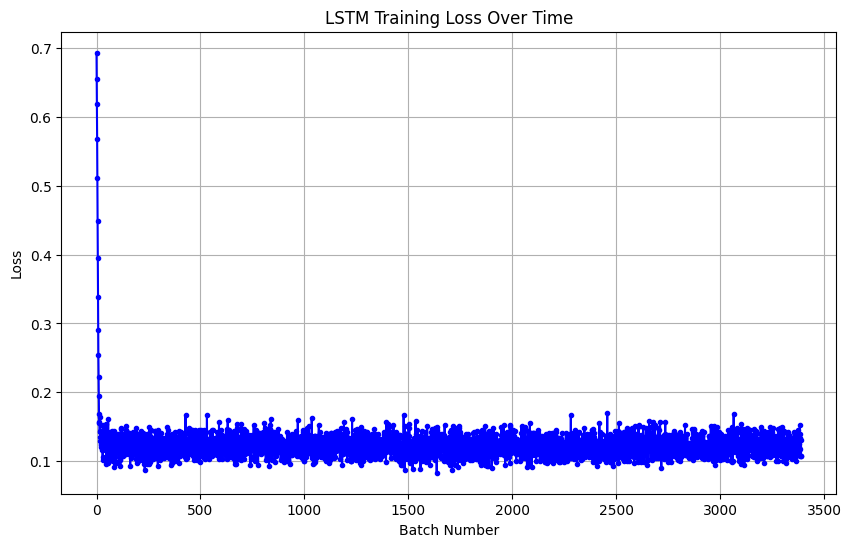

In [ ]:
import matplotlib.pyplot as plt
# Visualization of the loss over time
plt.figure(figsize=(10, 6))
plt.plot(loss_values, marker='o', linestyle='-', color='b', markersize=3)
plt.title('LSTM Training Loss Over Time')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
len(loss_values)

3389

## **Model Evaluation** ##

In [ ]:
#Load Test Data
df_test_1 = pd.read_csv(
    test_file_path,
    sep=r'\s*:::\s*',
    engine='python',
    names=test_column_names,
    encoding='utf-8',
    skip_blank_lines=True
)

# Preprocess the descriptions
df_test_1['cleaned_description'] = df_test_1['DESCRIPTION'].apply(preprocess_text_2)

In [ ]:
#Tokenize Test Data
test_inputs = tokenizer_distilbert(
    df_test_1['cleaned_description'].tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Prepare input tensors
test_input_ids = test_inputs['input_ids']
test_attention_masks = test_inputs['attention_mask']

In [ ]:
#DataLoader for the test dataset
test_dataset = TensorDataset(test_input_ids)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Define the proportion of data to use for validation (e.g., 10%)
validation_size = 0.1  # 10% for validation, 90% for training

# Perform the split
df_train_1, df_val = train_test_split(
    df_train_2,
    test_size=validation_size,
    random_state=42,  # For reproducibility
    shuffle=True,     # Shuffle the data before splitting
    stratify=genre_targets  # Ensure proportional representation of classes
)

# Reset indices for both DataFrames
df_train_1 = df_train_1.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

print(f"Training samples: {df_train_1.shape[0]}")
print(f"Validation samples: {df_val.shape[0]}")

Training samples: 48792
Validation samples: 5422


In [ ]:
# Tokenize validation data (similar to test data)
val_inputs = tokenizer_distilbert(
    df_val['cleaned_description'].tolist(),  # Assuming 'cleaned_description' column
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)
val_input_ids = val_inputs['input_ids']
val_attention_masks = val_inputs['attention_mask']  # May need attention masks

In [ ]:
# Create DataLoader for validation data
val_dataset = TensorDataset(val_input_ids)  # Include val_attention_masks if needed
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Function to evaluate the model
def evaluate(model, dataloader, device):
    model.eval()
    preds = []
    true_labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_masks, labels = batch  # Unpack all three elements
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(input_ids)

            # Collect predictions and true labels
            preds.append(outputs.cpu().numpy())
            true_labels.append(labels.cpu().numpy())

    # Concatenate all predictions and true labels
    preds = np.vstack(preds)
    true_labels = np.vstack(true_labels)

    # Convert probabilities to binary predictions
    preds_binary = (preds > 0.5).astype(int)

    # Calculate evaluation metrics
    f1 = f1_score(true_labels, preds_binary, average='micro')
    precision = precision_score(true_labels, preds_binary, average='micro')
    recall = recall_score(true_labels, preds_binary, average='micro')

    return f1, precision, recall

In [ ]:
# Training loop with validation
for epoch in range(1):
    model_lstm.train()
    for batch_idx, batch in enumerate(train_loader):
        lstm_inputs, lstm_labels = batch
        optimizer_lstm.zero_grad()

        # Forward pass
        lstm_outputs = model_lstm(lstm_inputs)

        # Calculate loss
        lstm_loss = loss_function(lstm_outputs, lstm_labels)

        # Backward pass and optimization
        lstm_loss.backward()
        optimizer_lstm.step()
        loss_values.append(lstm_loss.item())

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch}, Batch {batch_idx}, LSTM Loss: {lstm_loss.item()}")

Epoch 0, Batch 0, LSTM Loss: 0.10359866172075272
Epoch 0, Batch 100, LSTM Loss: 0.1272924691438675
Epoch 0, Batch 200, LSTM Loss: 0.13624553382396698
Epoch 0, Batch 300, LSTM Loss: 0.10344365984201431
Epoch 0, Batch 400, LSTM Loss: 0.10290507227182388
Epoch 0, Batch 500, LSTM Loss: 0.11442394554615021
Epoch 0, Batch 600, LSTM Loss: 0.13081906735897064
Epoch 0, Batch 700, LSTM Loss: 0.13296805322170258
Epoch 0, Batch 800, LSTM Loss: 0.11388086527585983
Epoch 0, Batch 900, LSTM Loss: 0.11114315688610077
Epoch 0, Batch 1000, LSTM Loss: 0.12459779530763626
Epoch 0, Batch 1100, LSTM Loss: 0.11212960630655289
Epoch 0, Batch 1200, LSTM Loss: 0.12555107474327087
Epoch 0, Batch 1300, LSTM Loss: 0.12565897405147552
Epoch 0, Batch 1400, LSTM Loss: 0.12422174215316772
Epoch 0, Batch 1500, LSTM Loss: 0.11532615125179291
Epoch 0, Batch 1600, LSTM Loss: 0.11831527203321457
Epoch 0, Batch 1700, LSTM Loss: 0.14318738877773285
Epoch 0, Batch 1800, LSTM Loss: 0.12055987864732742
Epoch 0, Batch 1900, LSTM

NameError: name 'val_loader' is not defined

In [ ]:
#LSTM model does'nt converge soon as expected, For just 2 epochs it tooks more than 2.5 hours,
#Hence interrupted the training and decided to fine tune the traditional ML model itself